In [4]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [5]:
!ls

data_exploit_1.ipynb  sample_submission.csv  test.csv  train.csv


In [7]:
submission_spl = pd.read_csv('sample_submission.csv')

In [8]:
submission_spl

,id,target
0,0,0.0364
1,1,0.0364
2,2,0.0364
3,3,0.0364
4,4,0.0364
5,5,0.0364
6,6,0.0364
7,8,0.0364
8,10,0.0364
9,11,0.0364


In [10]:
## Loading training data
train = pd.read_csv('train.csv')
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [13]:
print("Size of training data {} samples".format(len(train)))
train.tail()

Size of training data 595212


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,...,4,4,3,8,0,1,0,0,0,0


In [17]:
## Loading test data
test = pd.read_csv('test.csv')
test.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


In [18]:
print("Size of testing data {} samples".format(len(test)))
test.tail()

Size of testing data 892816 samples


,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
892811,1488022,0,1,6,0,0,0,1,0,0,...,4,2,3,4,0,1,0,0,1,0
892812,1488023,5,3,5,1,0,0,0,1,0,...,6,2,2,11,0,0,1,1,0,0
892813,1488024,0,1,5,0,0,1,0,0,0,...,5,2,2,11,0,1,1,0,0,0
892814,1488025,6,1,5,1,0,0,0,0,1,...,1,1,2,7,1,1,0,0,0,0
892815,1488026,7,1,4,1,0,0,0,0,1,...,5,2,2,7,0,1,1,1,0,0


In [21]:
label = train['target']
label.unique()

array([0, 1])

In [40]:
## Plotting label data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
label_dif = train.groupby(['target'], as_index=False).count()['id']

In [44]:
print('Unbalancing: {0:.3f} %'.format(100*min(label_dif[0], label_dif[1])/(label_dif[0]+label_dif[1])))

Unbalancing: 3.645 %


## Label values
- target = 0 - claim was not filled for the policy holder
- target = 1 - claim was filled for the policy holder

## Prediction objective
- Predict the probability that an auto insurance policy holder files a claim

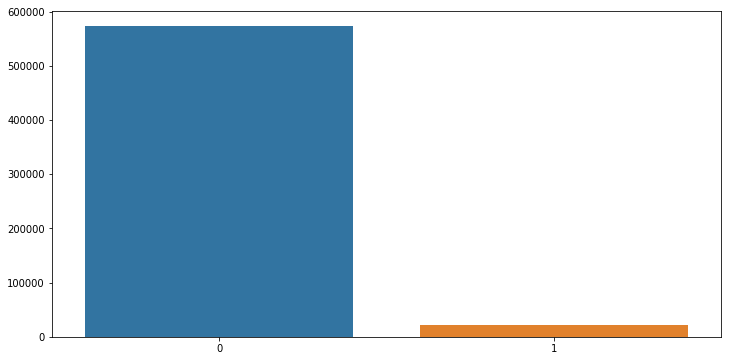

In [43]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.barplot(x=label_dif.index, y= label_dif.values)

## Regex and Data Wrangling

In [47]:
import re

In [48]:
import re
def isInd(name):
    match = re.search('^.*ind.*$',name)
    if match:
        return True
    else:
        return False

def isReg(name):
    match = re.search('^.*reg.*$',name)
    if match:
        return True
    else:
        return False
    
def isCar(name):
    match = re.search('^.*car.*$',name)
    if match:
        return True
    else:
        return False

def isCalc(name):
    match = re.search('^.*calc.*$',name)
    if match:
        return True
    else:
        return False

def isCat(name):
    match = re.search('^.*cat.*$',name)
    if match:
        return True
    else:
        return False

def isBin(name):
    match = re.search('^.*bin.*$',name)
    if match:
        return True
    else:
        return False
    
def notBinOrCat(name):
    match = re.search('^.*bin.*$',name)
    if match:
        return False
    else:
        match = re.search('^.*cat.*$',name)
        if match:
            return False
        else:
            return True

In [50]:
ind_cols = [col for col in train.columns if isInd(col)]
reg_cols = [col for col in train.columns if isReg(col)]
car_cols = [col for col in train.columns if isCar(col)]
calc_cols= [col for col in train.columns if isCalc(col)]

ind_cat = [col for col in ind_cols if isCat(col)]
reg_cat = [col for col in reg_cols if isCat(col)]
car_cat = [col for col in car_cols if isCat(col)]
calc_cat= [col for col in calc_cols if isCat(col)]

ind_bin = [col for col in ind_cols if isBin(col)]
reg_bin = [col for col in reg_cols if isBin(col)]
car_bin = [col for col in car_cols if isBin(col)]
calc_bin= [col for col in calc_cols if isBin(col)]

ind_con = [col for col in ind_cols if notBinOrCat(col)]
reg_con = [col for col in reg_cols if notBinOrCat(col)]
car_con = [col for col in car_cols if notBinOrCat(col)]
calc_con= [col for col in calc_cols if notBinOrCat(col)]

In [70]:
print("Total ind columns" + "-" * 20 + "\n{}\n".format(ind_cols))
print("Total ind-cat columns" + "-" * 20 + "\n{}\n".format(ind_cat))
print("Total ind-bin columns" + "-" * 20 + "\n{}\n".format(ind_bin))
print("Total ind-con columns" + "-" * 20 + "\n{}\n".format(ind_con))

Total ind columns--------------------
['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin']

Total ind-cat columns--------------------
['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat']

Total ind-bin columns--------------------
['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin']

Total ind-con columns--------------------
['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15']



In [71]:
print("Total reg columns" + "-" * 20 + "\n{}\n".format(reg_cols))
print("Total reg-cat columns" + "-" * 20 + "\n{}\n".format(reg_cat))
print("Total reg-bin columns" + "-" * 20 + "\n{}\n".format(reg_bin))
print("Total reg-con columns" + "-" * 20 + "\n{}\n".format(reg_con))

Total reg columns--------------------
['ps_reg_01', 'ps_reg_02', 'ps_reg_03']

Total reg-cat columns--------------------
[]

Total reg-bin columns--------------------
[]

Total reg-con columns--------------------
['ps_reg_01', 'ps_reg_02', 'ps_reg_03']



In [73]:
print("Total car columns" + "-" * 20 + "\n{}\n".format(car_cols))
print("Total car-cat columns" + "-" * 20 + "\n{}\n".format(car_cat))
print("Total car-bin columns" + "-" * 20 + "\n{}\n".format(car_bin))
print("Total car-con columns" + "-" * 20 + "\n{}\n".format(car_con))

Total car columns--------------------
['ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15']

Total car-cat columns--------------------
['ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']

Total car-bin columns--------------------
[]

Total car-con columns--------------------
['ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15']



In [74]:
print("Total calc columns" + "-" * 20 + "\n{}\n".format(calc_cols))
print("Total calc-cat columns" + "-" * 20 + "\n{}\n".format(calc_cat))
print("Total calc-bin columns" + "-" * 20 + "\n{}\n".format(calc_bin))
print("Total calc-con columns" + "-" * 20 + "\n{}\n".format(calc_con))

Total calc columns--------------------
['ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']

Total calc-cat columns--------------------
[]

Total calc-bin columns--------------------
['ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']

Total calc-con columns--------------------
['ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']



In [75]:
print(train.columns)
print(len(train.columns))

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


## Ploting Binary Features

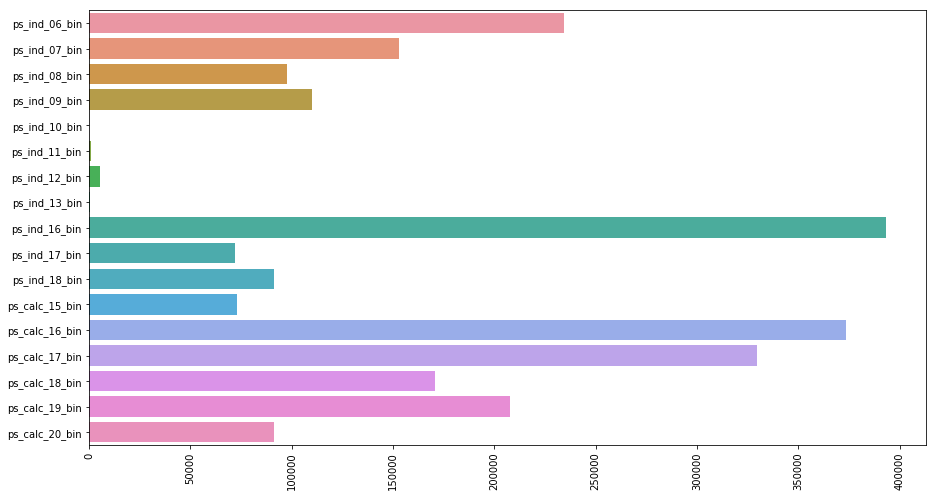

In [80]:
f, ax = plt.subplots(1,1,figsize=(15,8))
plt.xticks(rotation='vertical')
ibh = train[ind_bin].sum()
cbh = train[calc_bin].sum()
bins=pd.concat([ibh,cbh],axis=0)
sns.barplot(x=bins.values,y=bins.index, orient='h')

## Exploit correlation between clusters

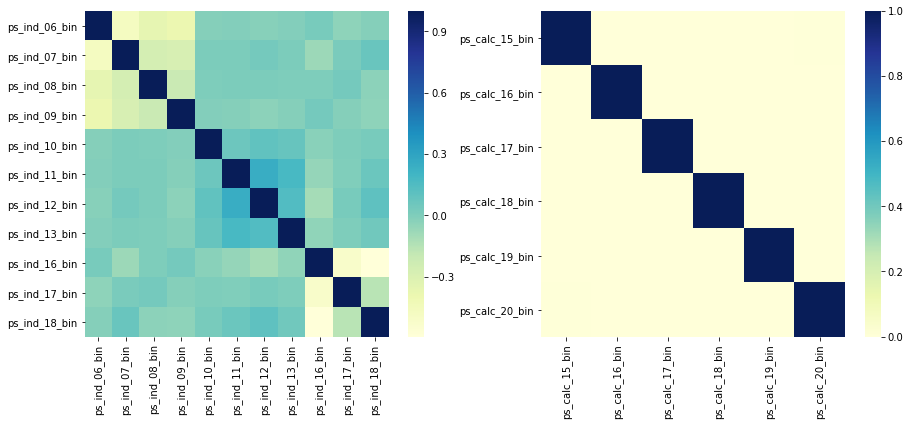

In [83]:
f, ax = plt.subplots(1,2,figsize=(15,6))
plt.xticks(rotation='vertical')
sns.heatmap(train[ind_bin].corr(), ax=ax[0], cmap="YlGnBu")
sns.heatmap(train[calc_bin].corr(), ax=ax[1], cmap="YlGnBu")

In [81]:
train[ind_bin].corr()

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin
ps_ind_06_bin,1.000000,-0.474009,-0.356838,-0.384345,-0.008978,-0.005229,-0.017499,-0.008390,0.028352,-0.037121,-0.011751
ps_ind_07_bin,-0.474009,1.000000,-0.260438,-0.280513,0.010740,0.010119,0.036619,0.012125,-0.072321,0.020776,0.076562
ps_ind_08_bin,-0.356838,-0.260438,1.000000,-0.211173,0.006489,0.010041,0.012254,0.007898,0.005855,0.036036,-0.033273
ps_ind_09_bin,-0.384345,-0.280513,-0.211173,1.000000,-0.006973,-0.014372,-0.030858,-0.010612,0.040109,-0.011023,-0.039631
ps_ind_10_bin,-0.008978,0.010740,0.006489,-0.006973,1.000000,0.064837,0.097998,0.081415,-0.024021,0.005366,0.027264
ps_ind_11_bin,-0.005229,0.010119,0.010041,-0.014372,0.064837,1.000000,0.250076,0.179432,-0.054007,0.003518,0.069017
ps_ind_12_bin,-0.017499,0.036619,0.012254,-0.030858,0.097998,0.250076,1.000000,0.151728,-0.099441,0.025181,0.109287
ps_ind_13_bin,-0.008390,0.012125,0.007898,-0.010612,0.081415,0.179432,0.151728,1.000000,-0.040680,0.004136,0.050823
ps_ind_16_bin,0.028352,-0.072321,0.005855,0.040109,-0.024021,-0.054007,-0.099441,-0.040680,1.000000,-0.518076,-0.594265
ps_ind_17_bin,-0.037121,0.020776,0.036036,-0.011023,0.005366,0.003518,0.025181,0.004136,-0.518076,1.000000,-0.158021


In [85]:
train[car_con]

,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15
0,2,0.400000,0.883679,0.370810,3.605551
1,3,0.316228,0.618817,0.388716,2.449490
2,1,0.316228,0.641586,0.347275,3.316625
3,1,0.374166,0.542949,0.294958,2.000000
4,3,0.316070,0.565832,0.365103,2.000000
5,2,0.445982,0.879049,0.406202,3.000000
6,2,0.316228,0.639683,0.368782,3.162278
7,3,0.446990,0.900574,0.374833,3.316625
8,3,0.400000,0.780641,0.407431,2.828427
9,2,0.447214,1.458184,0.390256,3.605551


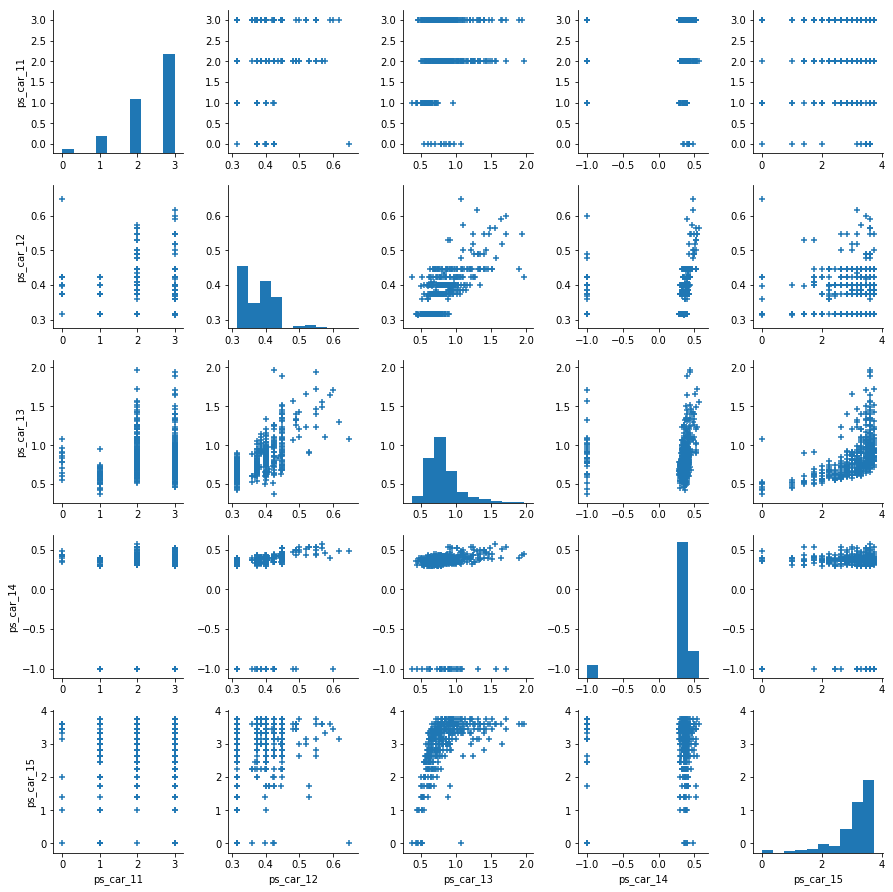

In [86]:
sns.pairplot(train[car_con][0:500], markers='+')

## Checking how target class are distributed among CAR features

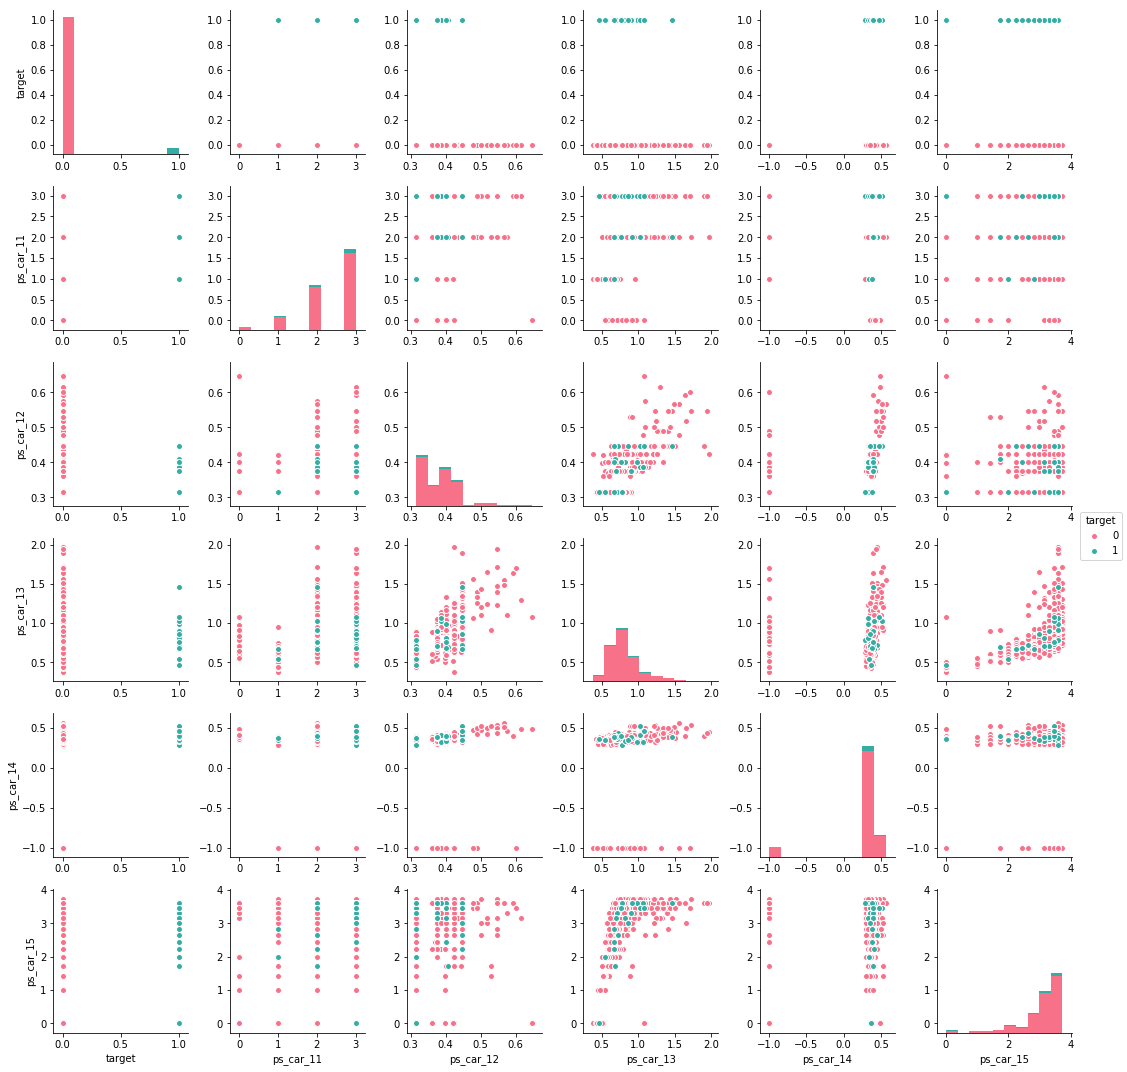

In [88]:
tmp = pd.concat([train['target'],train[car_con]], axis=1)
sns.pairplot(tmp[0:500], hue='target', palette= 'husl')

## Checking how target class are distributed among REG features

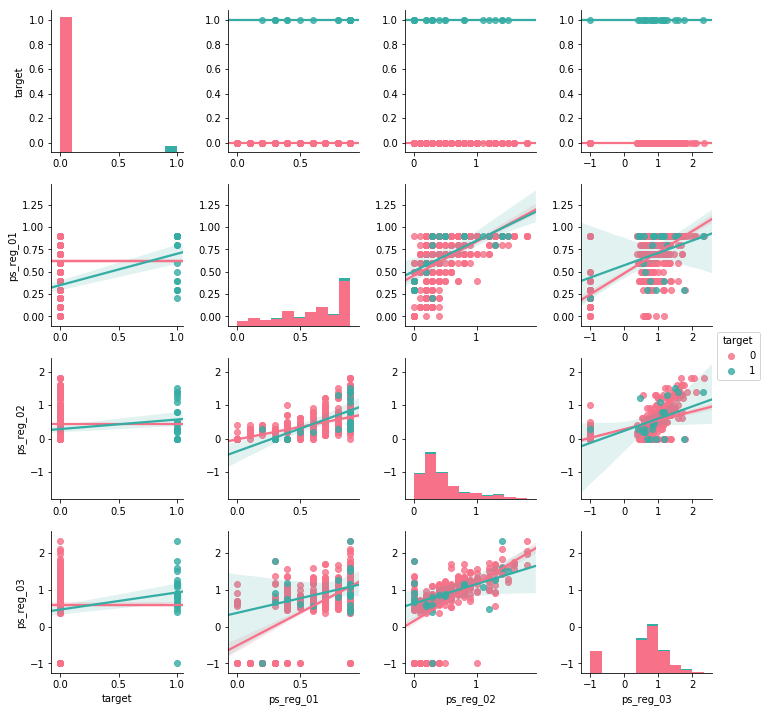

In [98]:
tmp = pd.concat([train['target'],train[reg_con]],axis=1)
sns.pairplot(tmp[0:500],hue='target',palette="husl",kind='reg')

## Checking how target class are distributed among IND features

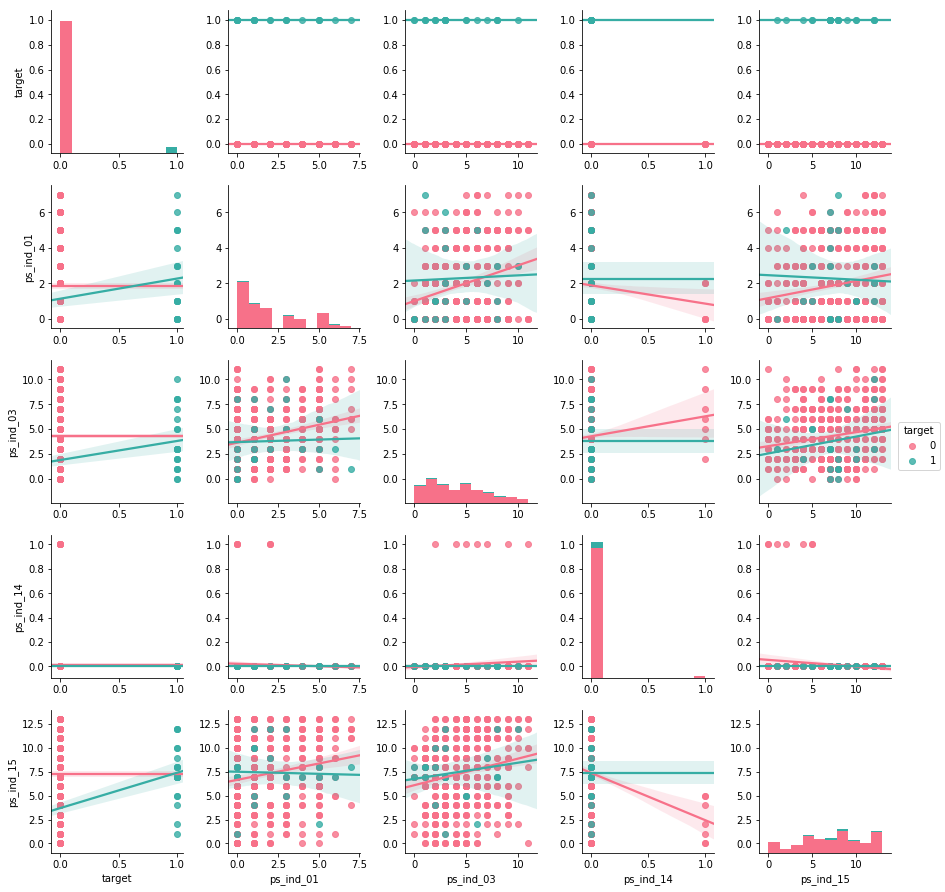

In [99]:
tmp = pd.concat([train['target'],train[ind_con]],axis=1)
sns.pairplot(tmp[0:500],hue='target',palette="husl", kind='reg')

## Checking how target class are distributed among CALC features

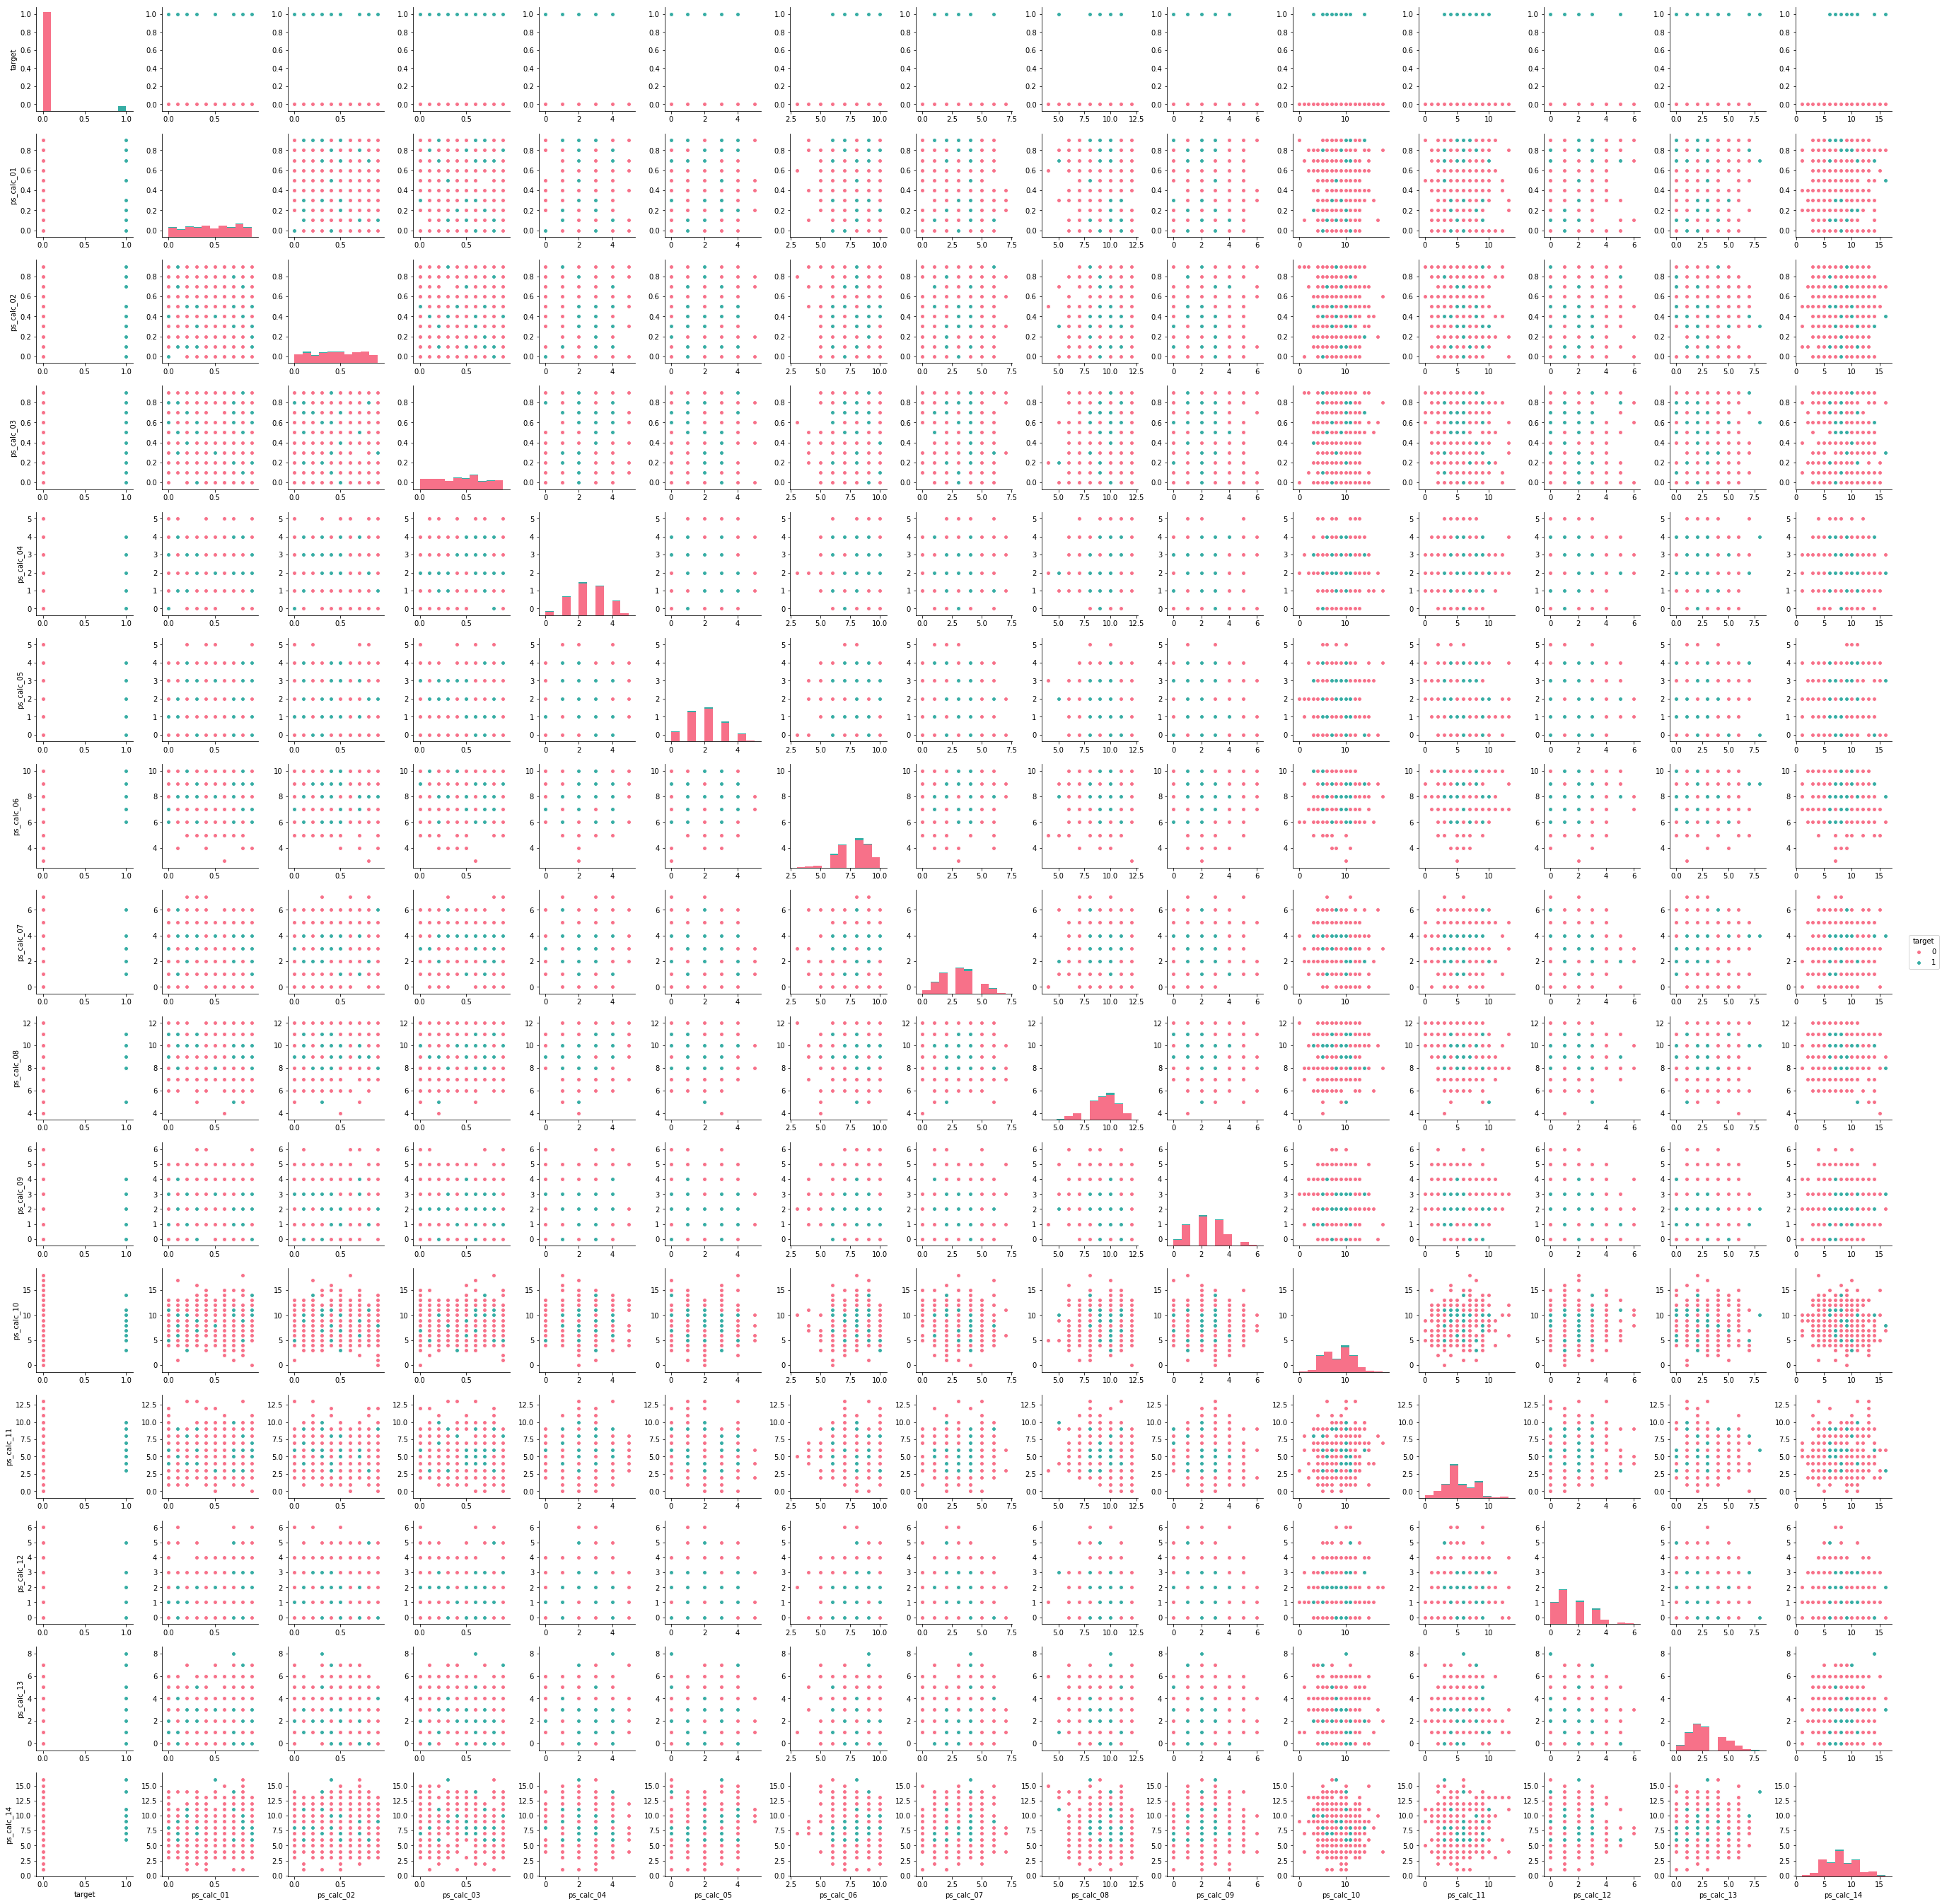

In [93]:
tmp = pd.concat([train['target'],train[calc_con]],axis=1)
sns.pairplot(tmp[0:500],hue='target',palette="husl")

## Categorical features

In [94]:
train[ind_cat].head()

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat
0,2,1,0
1,1,0,0
2,4,1,0
3,1,0,0
4,2,1,0


In [95]:
train[reg_cat].head()

""
0
1
2
3
4


In [96]:
train[car_cat].head()

,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
0,10,1,-1,0,1,4,1,0,0,1,12
1,11,1,-1,0,-1,11,1,1,2,1,19
2,7,1,-1,0,-1,14,1,1,2,1,60
3,7,1,0,0,1,11,1,1,3,1,104
4,11,1,-1,0,-1,14,1,1,2,1,82


In [97]:
train[calc_cat].head()

""
0
1
2
3
4


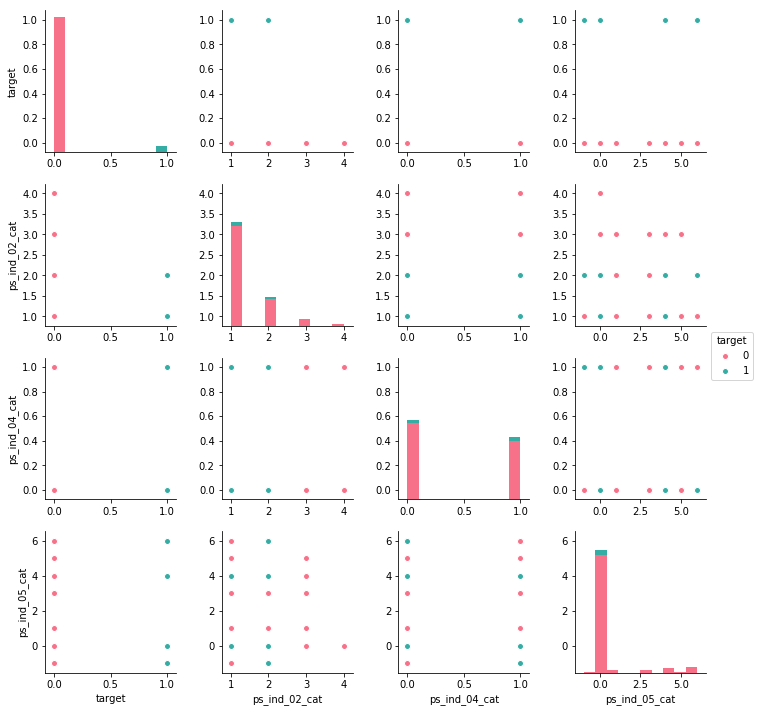

In [100]:
tmp = pd.concat([train['target'],train[ind_cat]],axis=1)
sns.pairplot(tmp[0:500],hue='target',palette="husl")

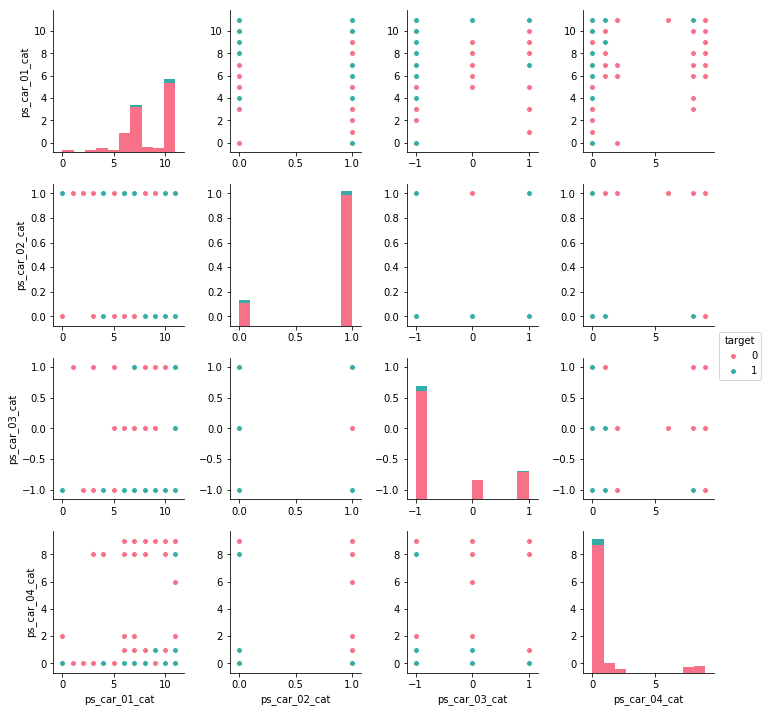

In [111]:
tmp = pd.concat([train['target'],train[car_cat]],axis=1)
sns.pairplot(tmp[0:500],hue='target',palette="husl", 
             vars=['ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_04_cat'])